# PCA 주성분 분석
상관관계가 존재하는 변수 $X^t = (X_1....X_q)$  내의 변동을 X변수들의 선형 결합으로 서로 상관되지 않는 새로운 변수들인 $ Y^t = (Y_1....Y_q) $ 에 의해 설명 
$$ Y^t = (Y_1,...,Y_q) : principal\ components $$ 
- 희망사항: 처음 몇 개의 주성분이 원래 변수 내의 변동의 많은 부분을 설명
- 서로 상관성이 높은 여러 변수들의 선형조합으로 만든 새로운 변수들로 요약, 축소하는 방법 

상관계수 => 공분산을 표준화 시켜서 각각의 분산의 곱으로 나누는 값과 동일하다.
### 숫자형 변수만 사용가능하고 명목형 변수는 사용할 수 없다. 즉, 명목형 변수값들은 숫자형으로 변화시켜야한다.

### 활용 예 
 - 시험 수행의 전반적인 결과에 대한 정보를 나타내는 **지수** 작성
  - 순위 매기는 방법의 향상 위해 학생들의 점수를 최대한 펼치고 싶음
  - 점수 표준화, 가중치 고려
 - 동물들의 **형태학상 측정값**을 사용해 동물 간의 구분을 위한 요소 찾음 
  - 첫번째 주성분: 크기
  - 두번째 주성분: 모양 => 관심사
 - 그래프 표현 또는 다른 분석을 위한 **입력변수**로 활용

## 주성분분석, 요인분석은 왜 하는가?  어떤 분석에 연계활용되나? 

#### 1. 여러 변수들 간에 내재하는 상관관계, 연관성을 이용해 소수의 주성분 또는 요인으로 차원을 축소함으로써 데이터를 이해하기 쉽고 관리하기 쉽게 해줍니다.  
 - 사람은 1차원, 2차원까지는 그래프로 그려서 직관적으로 이해를 할 수 있지만, 3차원 이상으로만 넘어가도 집단의 모습을 인식하는데 큰 어려움을 겪게 됩니다.(향후 홀로그램이 상용화되면 3차원까지는 그래도 사람이 인지하기 편할수도 있겠네요 ^^;)  <br> 만약 변수가 10개 있는데 이를 단 2개의 차원으로 요약을 했는데도 변수들이 가지는 변동을 80~90% 설명할 수 있다면 굳이 변수 10개를 모두 이용할 필요가 없겠지요.

#### 2. 회귀분석이나 의사결정나무(decision tree) 등의 모형 개발 시 입력변수들간의 상관관계가 높은 다중공선성(multicollinearity)이 존재할 경우 모형이 잘못만들어지고 따라서 해석에도 문제가 생기게 됩니다.  
 - 다중공선성이 존재할 경우 해결 방법 중의 하나가 바로 상관도가 높은 변수들을 하나의 주성분 혹은 요인으로 축소하여 모형개발에 활용하는 것입니다.
 
#### 3. 연관성이 높은 변수 간 주성분 또는 요인분석을 통해 차원을 축소한 후에 군집분석을 수행하면 군집화 결과, 연산속도 개선에 기여하게 됩니다.  
 - 가령, Benefit 고객세분화를 위해 survey를 하게 되면 소구점들에 대한 다수의 문항(변수)의 답변 결과에 대해서 먼저 요인분석을 한 후에 요인점수(factor score)를 가지고 군집분석(clustering)을 수행하고 세분군집을 명명(naming)하게 됩니다.
 
#### 4. 기계에서 나오는 다수의 센서데이터를 주성분분석이나 요인분석을 하여 차원을 축소한 후에 시계열로 분포나 추세의 변화를 분석하면 기계의 고장(fatal failure) 징후를 사전에 파악하는데 활용하기도 합니다.

## 표본 주성분의 발견: 1st PC 
 - 표본분산이 모든 가능한 선형 결합 중에서 가장 큰 원래 변수들의 선형 결합
$$ Y_1 = a_{11}X_1 + a_{12}X_2 + .... + a_{1q}x_q $$ 
 - $a_1^ta_1 = 1 $ 의 제약조건 하에서 ** $y_1$ 의 분산을 최대화** 하는 $a_1^T = (a_{11},a_{12},....,a_{1q})$ 를 찾음  
 - $y_1$을 최대화 하는 축 발견 
 
 
$ y_1 = a_1^Tx $ 행렬의 곱
 - $a_1= [a_1,a_2,\cdots,a_q]$
 - $a_1^T = transpose(a_1)$ 
   - $\begin{bmatrix} 
      a_1 \\
      \vdots \\
      a_q 
     \end{bmatrix}$
 - $x=[x_1,\cdots,x_q]$
 - $a_1^Tx = \begin{bmatrix} 
      a_1 \\
      \vdots \\
      a_q 
     \end{bmatrix} [x_1,\cdots,x_q] $

![주성분](photo/1.PNG)

분산이 고만고만하면 각각의 요소의 가중치를 밝힐 수 가 없다. <br>
즉, 분산이 넓어야 각 요소의 중요도를 알 수 있다. 

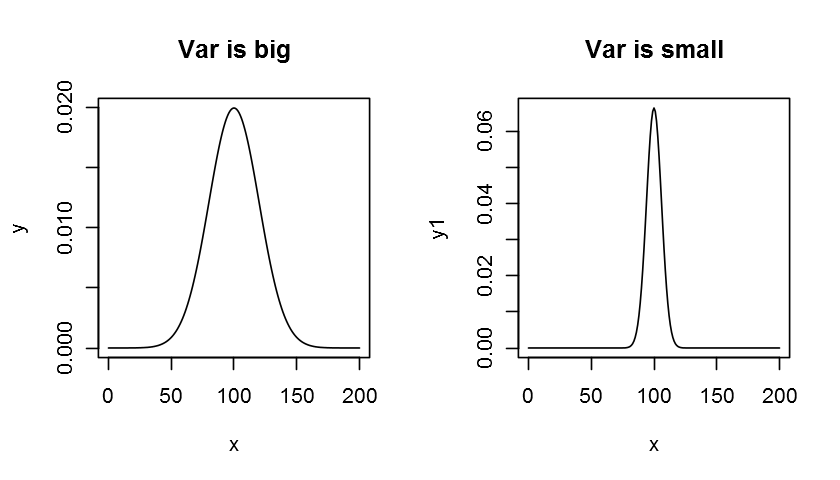

In [1]:
options(repr.plot.height = 4)
par(mfrow=c(1,2))
x <- seq(0,200,1)
y <- dnorm(x,mean=100,sd=20)
plot(x,y,type="l",main="Var is big")
y1 <- dnorm(x,mean=100,sd=6)
plot(x,y1,type="l", main = "Var is small")

- $S:x$ 의 $q$ x $q$ 표본공분산행렬 
- Find $y_1 = a_1^Tx$ with the maximum variance 
$$var(y_1) = a_1^TSa_1$$
만일 $x$가 표준화 되었다면, $S=R, var(y_1) = a_1^TRa_1$

- Maximize $a'Ra$ subject to $a'a = 1$
 - Lagrange multiplier method 
 $$ L = a'Ra - \lambda(a'a-1)$$
 $$ { dL \over d\lambda } = 2Ra - 2\lambda a = 0 $$
 $$ Ra = \lambda a $$
- ** =>Eigenvalue problem **
 - $\lambda : R $ 의 고유값, $a : R$의 고유 벡터(eigenvector)
- If $R$ is full rank, there exist $p$ of real number eigenvalues.
- If $R$ is positive definite, all the eigenvalues are positive.

가장 큰 고유값에 대응하는 고유벡터=$a_1$

## 고유값 & 고유벡터 
 - 고유값
  - $\lambda_1 \cdots \lambda_q = (y_1,\cdots,y_q $ 의 분산$) $ 
  - 변수의 갯수가 5개의 경우 $y_1,\cdots,y_5$ 총 5개의 $y$가 생성된다. 
 - 고유벡터
  - $a_1,\cdots,a_q$ 고유값에 각각 대응하는 PC식의 가중치
  - $ y_1 = a_1x_1 + \cdots + a_qx_q $

# 표본 주성분의 발견 : 2nd PC 
 - 결론 : 축만 돌려서 정보손실이 적다. 
 - $y1$의 정보를 제거한 후 의 데이터는? projection 시킴 
 - $y1$의 정보를 제거한 후의 scatter plot matrix 
 - 오른쪽 $3d$ **scatter plot**에서 가장 큰 분산을 가지는 방향 
 $$a_2' = (a_{21},a_{22},...,a_{2q})$$
 - $2^{nd} PC : y_2 = a_2'X $
 
<img src="photo/2.PNG">

$ y_2 = a_{21}x_1 + a_{22}x_2 + ... + a_{2q}x_q $

$ y_2 = a_2^Tx $
- $y_1$의 축에 수직인 평면을 찾는다. 즉, $y_1$과 독립적인 요소들을 찾는다. (정보공유X) $Cor=0$
- 제약식 : $a_2^Ta_2 = 1, \ a_2^Ta_1 = 0 $ 
- 두 번째로 큰 고유값에 대응하는 고유벡터  $ = a_2 $ 
 - 럭비공 모양의 Plot 단면에서 가장 높은 분산을 가지는 축을 찾는다. 
 - 즉, $y_2$의 분산이 가장 $\uparrow$

<img src="photo/3.PNG">

## Example : Open/closed book
 - ** Test score for mechanics, vectors, algebra, analysis, statistics **

In [4]:
library(psych)

In [6]:
data <- read.csv("open_closed.csv", stringsAsFactors = F)
head(data)
str(data)

,mechanics_C,vectors_C,algebra_O,analysis_O,statistics_O
1,77,82,67,67,81
2,63,78,80,70,81
3,75,73,71,66,81
4,55,72,63,70,68
5,63,63,65,70,63
6,53,61,72,64,73


'data.frame':	88 obs. of  5 variables:
 $ mechanics_C : int  77 63 75 55 63 53 51 59 62 64 ...
 $ vectors_C   : int  82 78 73 72 63 61 67 70 60 72 ...
 $ algebra_O   : int  67 80 71 63 65 72 65 68 58 60 ...
 $ analysis_O  : int  67 70 66 70 70 64 65 62 62 62 ...
 $ statistics_O: int  81 81 81 68 63 73 68 56 70 45 ...


- 서로의 다른 값들이 가지고 있을 경우는 상관계수를 활용하는 것이 좋다 
 - $Mean=0, sd=1$로 통일하여 데이터 분석 수행

In [8]:
cor(data) 

,mechanics_C,vectors_C,algebra_O,analysis_O,statistics_O
mechanics_C,1.0000000,0.5534052,0.5467511,0.4093920,0.3890993
vectors_C,0.5534052,1.0000000,0.6096447,0.4850813,0.4364487
algebra_O,0.5467511,0.6096447,1.0000000,0.7108059,0.6647357
analysis_O,0.4093920,0.4850813,0.7108059,1.0000000,0.6071743
statistics_O,0.3890993,0.4364487,0.6647357,0.6071743,1.0000000


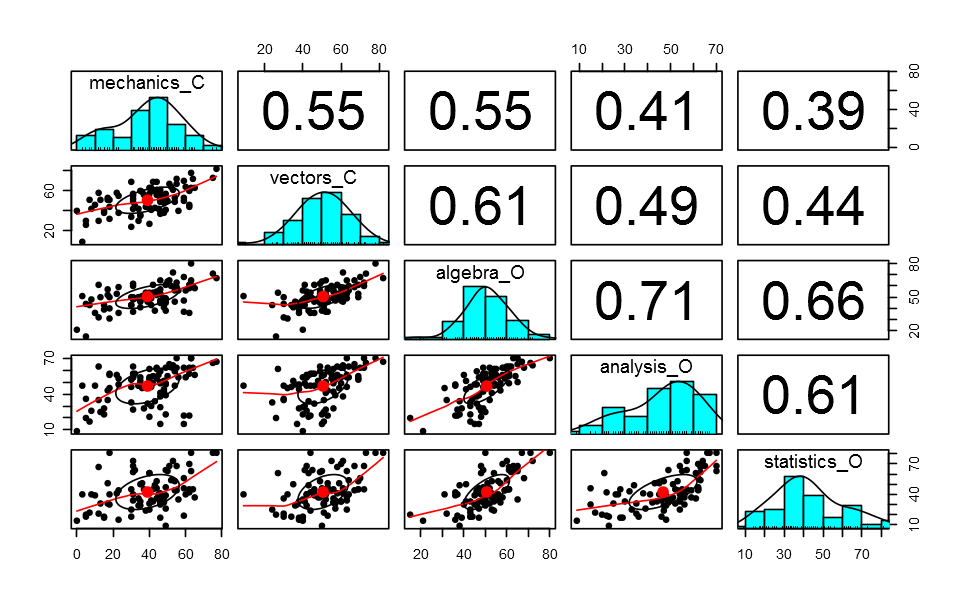

In [11]:
options(repr.plot.width=8,repr.plot.height=5)
pairs.panels(data)

- Standard deviation = $\sqrt{\lambda}$      $   \lambda $ is 고유값

In [12]:
pca = prcomp(data,scale=T)  # 상관계수로 주성분 분석을 한다. scale된 변수로 (평균0 표편1)
summary(pca) # 각 변수의 표준 편차라 생각하면 된다. 

Importance of components:
                          PC1    PC2     PC3     PC4     PC5
Standard deviation     1.7835 0.8600 0.66706 0.62281 0.49658
Proportion of Variance 0.6362 0.1479 0.08899 0.07758 0.04932
Cumulative Proportion  0.6362 0.7841 0.87310 0.95068 1.00000

- pc1부터 $Standard$ $deviation$가 가장 큰 이유는 가장 큰 값들을 찾아왔으니깐.
- $Standard$ $deviations :\sqrt\lambda_i =>$ **sum of the squares** = 5 
- $Rotation :$ 열이 고유 벡터 => **sum of squares of each column** are 1 

### Proportion of Variance 
 - 총분산의 양은 동일하다. 축만 바꼈을 뿐이다. x1,x2,x3 였느냐 y1,y2,y3 였느냐  
 - 즉, y1+...+y5 = 총분산량  
 - $PC1$이 전체 분산량을 얼마만큼 설명하는가?  그래서 점점 작아진다. 분산이 가장 큰 부분부터 찾아왔으니깐. 
  - 뒤의 3개변수는 10프로도 안되는 설명을한다. 총 2개의 변수를 가지고 설명하면 더욱 효율성이 있지 않느냐 
  - 그 변수가 Y1, Y2가 되는 것이다. 새로운 도식이 나온다. 
 - 상관관계로 했을 경우는 분산이 1이므로 총분산은 변수의 갯수 만큼 되지만 상관계수로 했을 경우는 총 분산 / 변수의 수 

In [13]:
pca

Standard deviations:
[1] 1.7835302 0.8599836 0.6670571 0.6228101 0.4965788

Rotation:
                    PC1        PC2         PC3        PC4        PC5
mechanics_C  -0.3996045 -0.6454583  0.62078249 -0.1457865 -0.1306722
vectors_C    -0.4314191 -0.4415053 -0.70500628  0.2981351 -0.1817479
algebra_O    -0.5032816  0.1290675 -0.03704901 -0.1085987  0.8466894
analysis_O   -0.4569938  0.3879057 -0.13618182 -0.6662561 -0.4221885
statistics_O -0.4382444  0.4704545  0.31253342  0.6589164 -0.2340223

 $PC_1$ $(y_1) = -0.40x_1 + -0.43x_2 + -0.50x_3 + -0.46x_4 + -0.44x_5$ 로 해석할 수 있다. 
 - $PC_2 \cdots PC_5$ 
 - 변수 갯수가 5개 이기때문에 $PC_5$까지 나온다. 

In [15]:
str(pca)

List of 5
 $ sdev    : num [1:5] 1.784 0.86 0.667 0.623 0.497
 $ rotation: num [1:5, 1:5] -0.4 -0.431 -0.503 -0.457 -0.438 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "mechanics_C" "vectors_C" "algebra_O" "analysis_O" ...
  .. ..$ : chr [1:5] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:5] 39 50.6 50.6 46.7 42.3
  ..- attr(*, "names")= chr [1:5] "mechanics_C" "vectors_C" "algebra_O" "analysis_O" ...
 $ scale   : Named num [1:5] 17.5 13.1 10.6 14.8 17.3
  ..- attr(*, "names")= chr [1:5] "mechanics_C" "vectors_C" "algebra_O" "analysis_O" ...
 $ x       : num [1:88, 1:5] -4.29 -4.54 -4.1 -3.03 -2.88 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:5] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


 - $PC_1$을 만들기 위한 $weight$ 각각의 열에 $x_1,\cdots,x_5$를 곱한 것에 대한 합 $ = y_1$

In [1]:
pca$rotation[,1] # PC1의 weight

mechanics_C    vectors_C    algebra_O   analysis_O statistics_O 
  -0.3996045   -0.4314191   -0.5032816   -0.4569938   -0.4382444

 - $y_1$의 값 $ \Longrightarrow Data$의 갯수와 동일한 크기로 나온다.
 - 아래 값은 $y_1,\cdots,y_2$ 의 값들이다. 

In [26]:
head(data.frame(pca$x[,1]))

,pca.x...1.
1,-4.285041
2,-4.541989
3,-4.10269
4,-3.026846
5,-2.882081
6,-2.988775


 - $Matrix(88x5)$ $X$ $T(a)$ $Matrix(1x5)$

In [28]:
data_s <- scale(data) # 88x5 matrix  muliplex t(a)(1x5 Matrix)
summary(data_s)

  mechanics_C        vectors_C          algebra_O          analysis_O     
 Min.   :-2.2277   Min.   :-3.16354   Min.   :-3.35087   Min.   :-2.5383  
 1st Qu.:-0.5121   1st Qu.:-0.65345   1st Qu.:-0.52728   1st Qu.:-0.7364  
 Median : 0.1456   Median : 0.03112   Median :-0.05669   Median : 0.1562  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.5888   3rd Qu.: 0.71569   3rd Qu.: 0.62568   3rd Qu.: 0.6951  
 Max.   : 2.1757   Max.   : 2.38908   Max.   : 2.76690   Max.   : 1.5708  
  statistics_O    
 Min.   :-1.9302  
 1st Qu.:-0.6553  
 Median :-0.1337  
 Mean   : 0.0000  
 3rd Qu.: 0.5328  
 Max.   : 2.2424  

 - 행렬의 곱

In [30]:
tmp <- data_s%*%pca$rotation[,1]  # 행렬의 곱.
head(tmp)

-4.285041
-4.541989
-4.10269
-3.026846
-2.882081
-2.988775


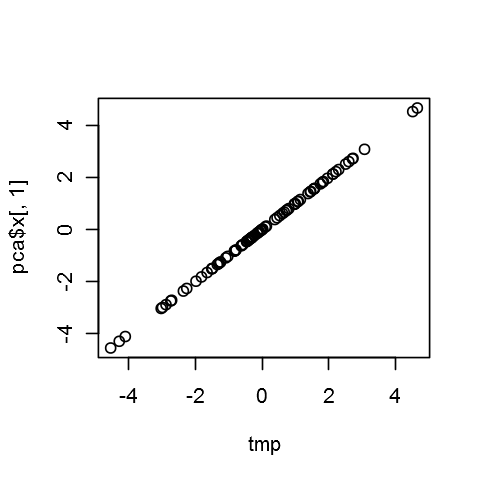

In [34]:
options(repr.plot.width=4,repr.plot.height=4)
plot(tmp,pca$x[,1])

<img src="photo/4.PNG">

In [36]:
cor(pca$x[,1],pca$x[,2])

[1] -8.547928e-17

![PNG](photo/5.PNG)

- 표편을 ^2해도 1보다 작은 것은 작다
- 즉, PC1만 사용하고 나머지는 사용하지 않는다 라는 기준이 나온다. 분석가마다 기준을 선택한다.

In [38]:
summary(pca) # Standard deviation     1.7835 0.8600 0.66706 0.62281 0.49658

Importance of components:
                          PC1    PC2     PC3     PC4     PC5
Standard deviation     1.7835 0.8600 0.66706 0.62281 0.49658
Proportion of Variance 0.6362 0.1479 0.08899 0.07758 0.04932
Cumulative Proportion  0.6362 0.7841 0.87310 0.95068 1.00000

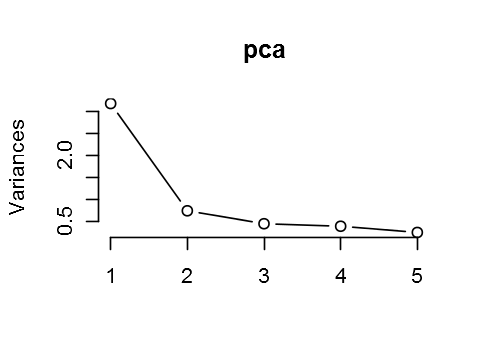

In [41]:
options(repr.plot.width=4,repr.plot.height=3)
plot(pca,type="l")

 - 2 이후부터 기울기가 극겹히 떨어진다. 2 이후는 사용하지 않는다 라고 생각하면 된다.(분석가 마음대로)
  - 꺽이는 부분을 엘보우라고한다. ( 여기서는 2)

# Example 2. 올림픽 7종 경기 결과 
    1988년 서울올림픽 25명 선수의 여자 7종경기 결과
    • 100m 허들(hurdle), 투포환(shot), 높이뛰기(highjump), 200m 달리기(run200m), 멀리뛰기(longjump), 
      투창( javelin), 800m 달리기(run800m)
    • 데이터의 구조를 탐색하고 득점 시스템에 의해 획득된 점수(score)와 어떻게 관련되는지 평가하려함

In [43]:
library(MVA)

In [45]:
head(heptathlon)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291.00
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897.00
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858.00
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540.00
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540.00
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411.00


 - 달리기는 적을 수록 빠른 것이다. 숫자가 크면 잘하는 걸로 만들어주고 시작해야 한다. 보기가 편하다

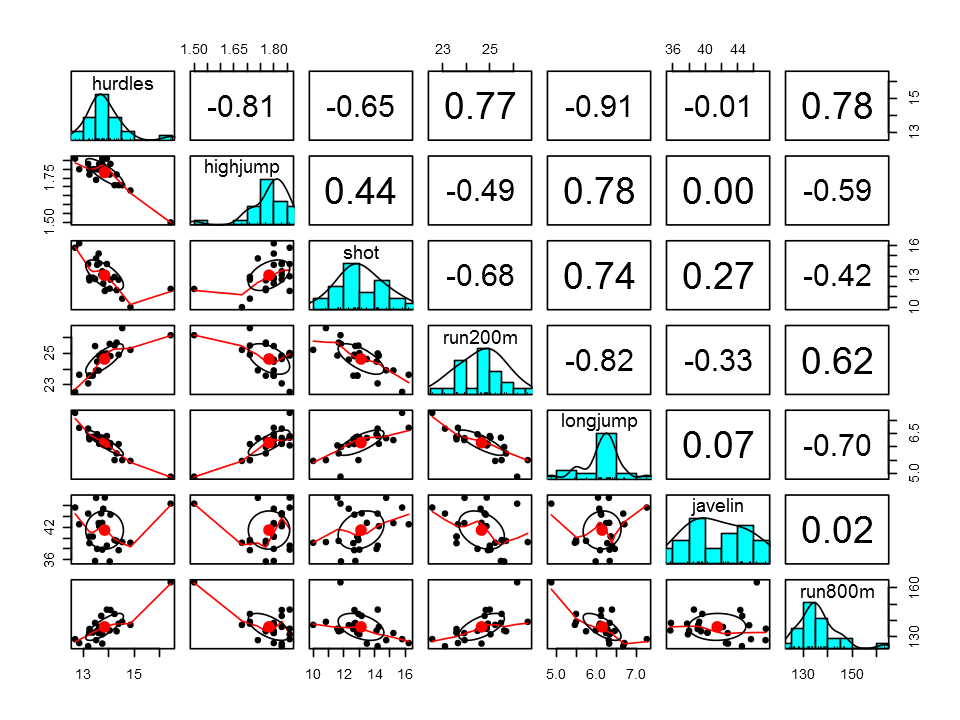

In [49]:
options(repr.plot.width=8,repr.plot.height=6)
pairs.panels(heptathlon[,-8]) # Cor가 음수가 많다. 

In [50]:
heptathlon$hurdles=with(heptathlon,max(hurdles)-hurdles)
heptathlon$run200m=with(heptathlon,max(run200m)-run200m)
heptathlon$run800m=with(heptathlon,max(run800m)-run800m)

In [53]:
summary(heptathlon)

    hurdles        highjump          shot          run200m         longjump    
 Min.   :0.00   Min.   :1.500   Min.   :10.00   Min.   :0.000   Min.   :4.880  
 1st Qu.:2.35   1st Qu.:1.770   1st Qu.:12.32   1st Qu.:1.380   1st Qu.:6.050  
 Median :2.67   Median :1.800   Median :12.88   Median :1.780   Median :6.250  
 Mean   :2.58   Mean   :1.782   Mean   :13.12   Mean   :1.961   Mean   :6.152  
 3rd Qu.:2.95   3rd Qu.:1.830   3rd Qu.:14.20   3rd Qu.:2.690   3rd Qu.:6.370  
 Max.   :3.73   Max.   :1.860   Max.   :16.23   Max.   :4.050   Max.   :7.270  
    javelin         run800m          score     
 Min.   :35.68   Min.   : 0.00   Min.   :4566  
 1st Qu.:39.06   1st Qu.:24.95   1st Qu.:5746  
 Median :40.28   Median :28.69   Median :6137  
 Mean   :41.48   Mean   :27.38   Mean   :6091  
 3rd Qu.:44.54   3rd Qu.:31.19   3rd Qu.:6351  
 Max.   :47.50   Max.   :39.23   Max.   :7291  

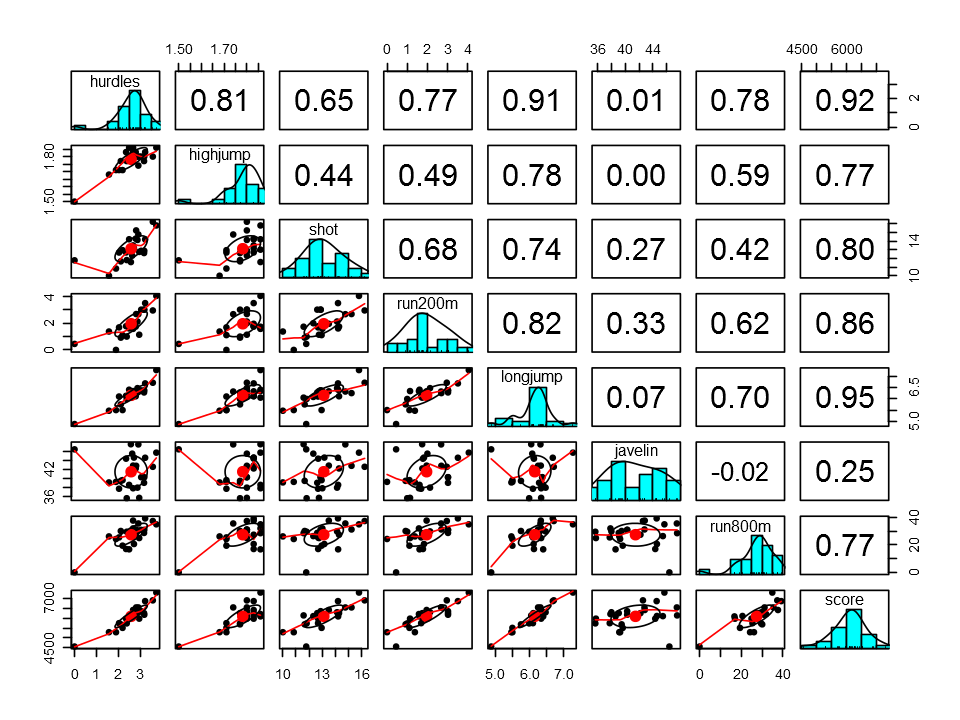

In [54]:
pairs.panels(heptathlon) # 이상치가 하나가 보이는 것으로 판단된다. 

In [56]:
heptathlon[heptathlon$highjump<=1.5,]

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Launa (PNG),0.00,1.50,11.78,0.45,4.88,46.38,0.00,4566.00


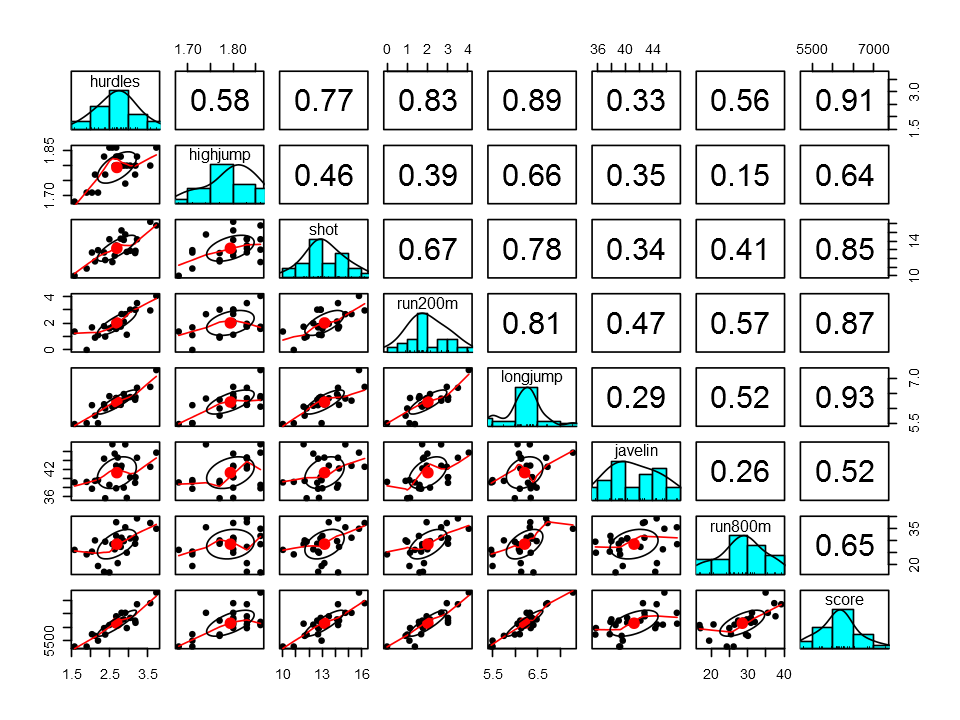

In [58]:
hp <- heptathlon[heptathlon$hurdles>0,]
pairs.panels(hp)

 - 서로 다른 종목이기때문에 scale을 하는 것이 좋다.

In [60]:
pca2 <- prcomp(hp[,-8],scale=T)
summary(pca2)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0793 0.9482 0.9109 0.68320 0.54619 0.33745 0.26204
Proportion of Variance 0.6177 0.1284 0.1185 0.06668 0.04262 0.01627 0.00981
Cumulative Proportion  0.6177 0.7461 0.8646 0.93131 0.97392 0.99019 1.00000

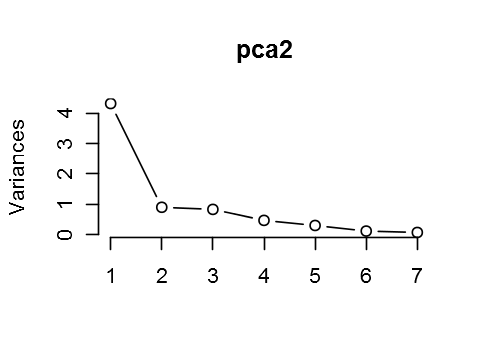

In [63]:
options(repr.plot.width=4,repr.plot.height=3)
plot(pca2,type="l")

[1] -0.9931168

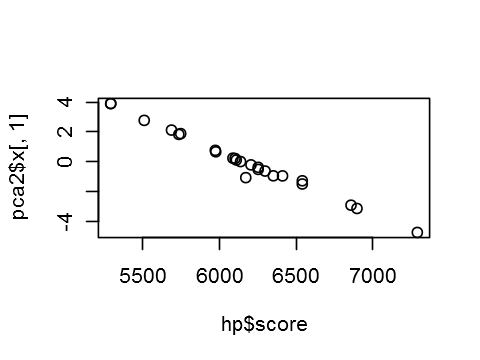

In [66]:
cor(hp$score,pca2$x[,1])#관계도가 엄청 높다. 거의 1에 가깝다.
plot(hp$score,pca2$x[,1])

## 행렬도 
- $PC_1$와 $PC_2$의 산점도이다.
- 원변수와 주성분 점수와의 관계를 그래프로 표현
- 우선 화살표는 빼놓고 어떤식으로 퍼저있는지. 
- rownames로 지정을 해줘야 이름이 마킹되서 나온다.

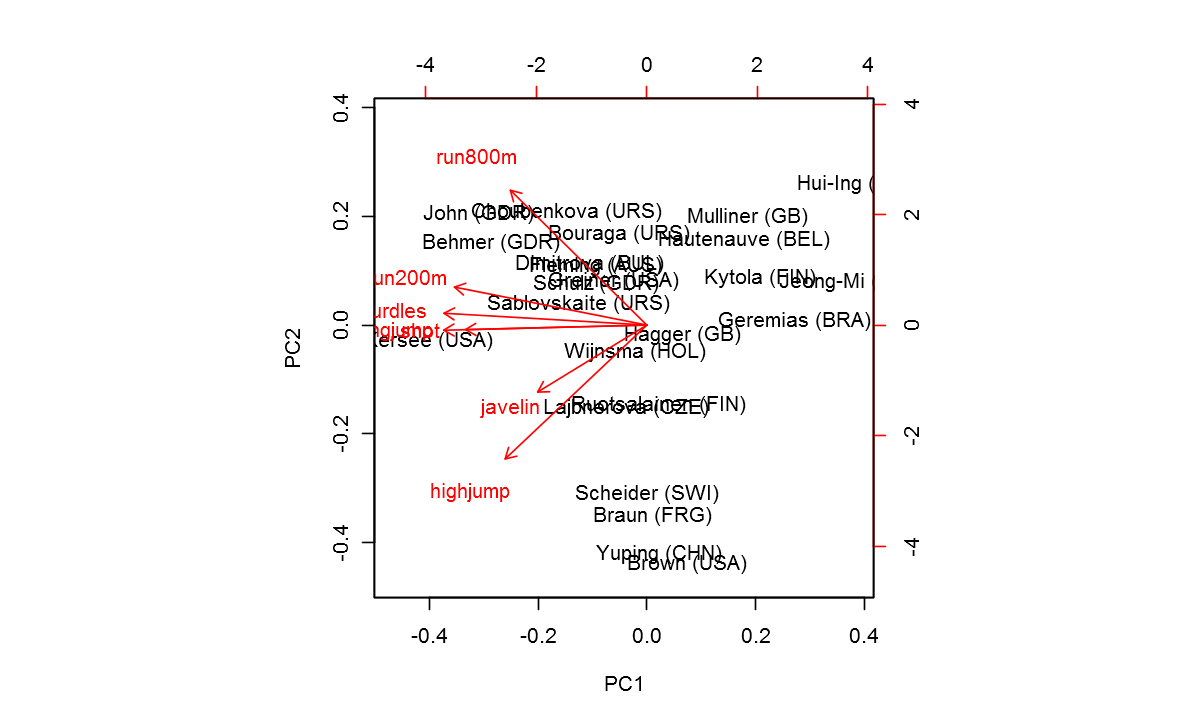

In [74]:
options(repr.plot.width=10,repr.plot.height=6)
biplot(pca2)

In [76]:
head(hp)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),3.73,1.86,15.80,4.05,7.27,45.66,34.92,7291.00
John (GDR),3.57,1.80,16.23,2.96,6.71,42.56,37.31,6897.00
Behmer (GDR),3.22,1.83,14.20,3.51,6.68,44.54,39.23,6858.00
Sablovskaite (URS),2.81,1.80,15.23,2.69,6.25,42.78,31.19,6540.00
Choubenkova (URS),2.91,1.74,14.76,2.68,6.32,47.46,35.53,6540.00
Schulz (GDR),2.67,1.83,13.50,1.96,6.33,42.82,37.64,6411.00


 - Joyner-Kersee (USA) 그림에서 가장 왼쪽에 있다. 즉, $PC_1$에서 $PC_1$의 값이 가장 작을 수록 잘한다. 
 - 화살표들이 x축과 평행할 수록 원변수가 $PC_1$에 관련도가 높다라는 것을 볼 수 있다. 
 - $PC_1$의 값들 $Rotation$과 비례한다. 
 - $y$축과 수직일 경우는 $PC_2$와 관계가 적다고 생각하면 된다. 

In [81]:
pca2$rotation[,1:2]

,PC1,PC2
hurdles,-0.45038762,0.05772161
highjump,-0.3145115,-0.6513316
shot,-0.40248839,-0.02202088
run200m,-0.4270860,0.1850278
longjump,-0.45096390,-0.02492486
javelin,-0.2423079,-0.3257223
run800m,-0.3029068,0.6565050


 - $PC_1$은 전체적으로 잘하고 못하고 그런것을 분별
 - $PC_2$는 $highjump$는 못하고 $run800m$는 잘하는 선수들을 분별할 수 있다. 즉, 장거리형 선수 

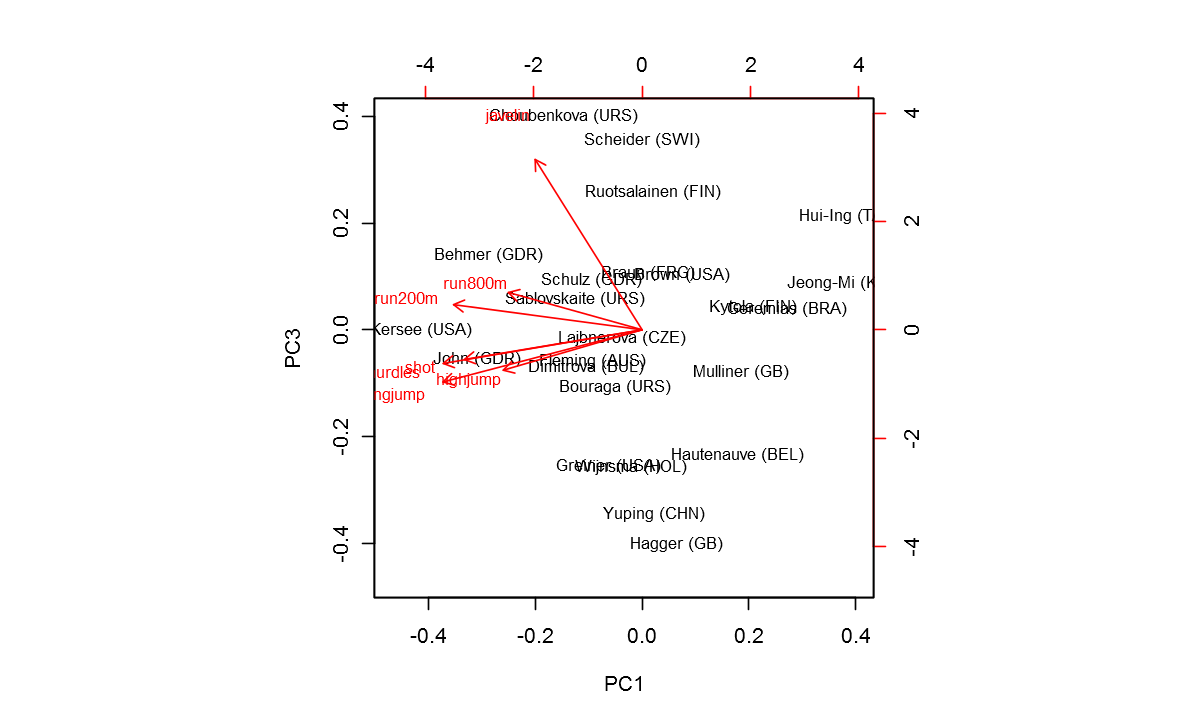

In [82]:
biplot(pca2,cex=0.8,choices = c(1,3)) #원하는 PC 2개를 선택하면 볼 수 있다.